In [1]:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

SyntaxError: invalid syntax (<ipython-input-1-00fa04b1a5f3>, line 1)

In [1]:
pip install nbconvert


The following command must be run outside of the IPython shell:

    $ pip install nbconvert

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the train and test dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#shape of train and test dataframes
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (1460, 81)
test shape: (1459, 80)


In [4]:
# Setting for display for columns and rows

pd.set_option('max_info_columns', 81)
pd.options.display.max_rows = 100

In [5]:
#learning the column names
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#checking for null values and getting list of columns where null values are more than 50%
null_cols = pd.DataFrame(100*(train.isnull().sum()/len(train.index)) > 1)
null_cols.reset_index(inplace=True)
null_cols.rename(columns={'index':'df_cols', 0:'condition'}, inplace = True)
null_cols.head()

,df_cols,condition
0,Id,False
1,MSSubClass,False
2,MSZoning,False
3,LotFrontage,True
4,LotArea,False


In [8]:
null_cols['condition'].astype('category').value_counts()

False    65
True     16
Name: condition, dtype: int64

In [9]:
cols = (null_cols.loc[null_cols['condition'] == False]).df_cols
new_train = train.loc[:,cols]
new_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#to check the categorical and numeric value columns
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [11]:
100*(new_train.isnull().sum()/len(train.index))

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF

In [12]:
#dropping un-necessary columns
new_train.drop(['Id'], axis=1, inplace = True)

In [13]:
new_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

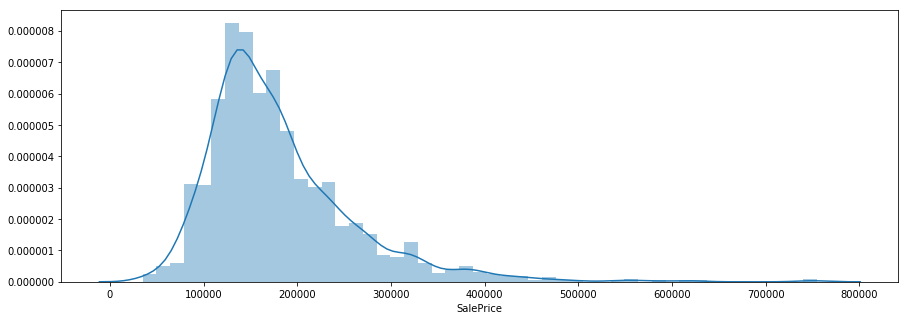

In [14]:
plt.figure(1)
plt.figure(figsize = (15,5))
sns.distplot(new_train['SalePrice'])
plt.show()

Observation: Sale price is around 150000, there are outlier values also

In [15]:
#taking all categorical values from the dataset
cat_train = new_train.select_dtypes(include = ['object'])
cat_train['SalePrice'] = new_train.loc[:,'SalePrice']
cat_train.head()

C:\Users\arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,250000


In [16]:
#checking the value distribution in columns
cat_train['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

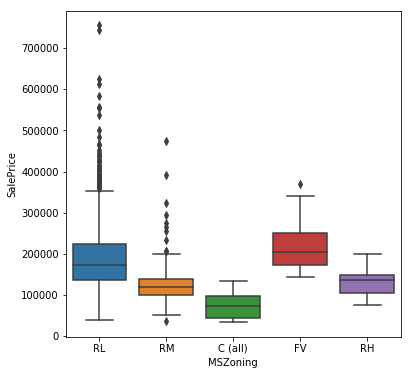

In [17]:
plt.figure(2)
plt.figure(figsize = (6,6))
sns.boxplot(x = 'MSZoning', y='SalePrice', data = cat_train)
plt.show()

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Observation: RL is common, and mean costlier too
FV is most expensive Zones

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [18]:
cat_train['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Observation: Most of the records are of Paved type, so we remove the Gravel rows

In [19]:
print(new_train.shape)
new_train = new_train.loc[new_train['Street'] == 'Pave']
print(new_train.shape)

(1460, 64)
(1454, 64)


Observation: Street column now has only value Paved in all the rows. Since the value is same we can remove it

In [20]:
#removing the Street column
new_train.drop(columns=['Street'], axis =1, inplace = True)
cat_train.drop(columns=['Street'], axis =1, inplace = True)
new_train.shape

(1454, 63)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [21]:
cat_train.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [22]:
cat_train['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

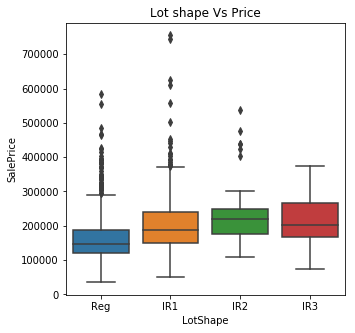

In [23]:
plt.figure(3)
plt.figure(figsize = (5,5))
plt.title('Lot shape Vs Price')
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = cat_train)
plt.show()

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

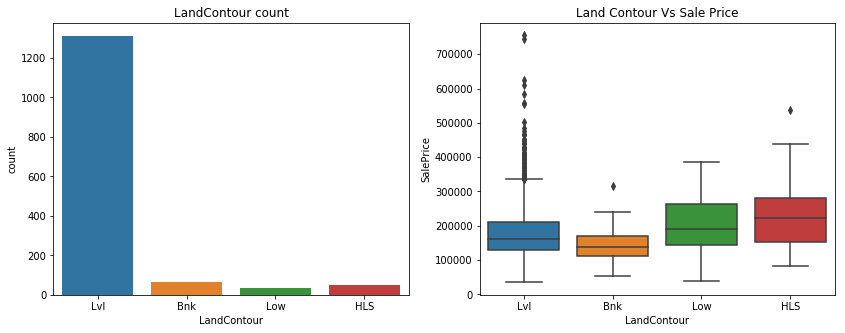

In [24]:
plt.figure(4)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('LandContour count')
sns.countplot(x = 'LandContour', data = cat_train)

plt.subplot(1,2,2)
plt.title('Land Contour Vs Sale Price')
sns.boxplot(x='LandContour', y='SalePrice', data = cat_train)

plt.show()

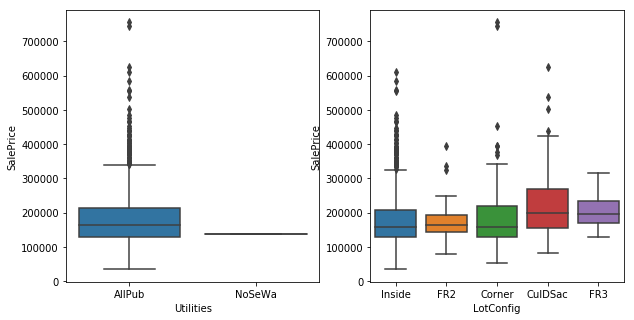

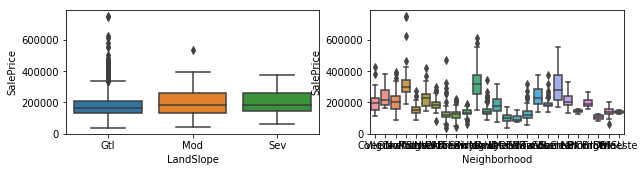

In [25]:
#'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
plt.figure(5)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Utilities', y='SalePrice', data = cat_train)

plt.subplot(1,2,2)
sns.boxplot(x='LotConfig', y='SalePrice', data = cat_train)
plt.figure(6)
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
sns.boxplot(x='LandSlope', y='SalePrice', data = cat_train)
plt.subplot(2,2,2)
sns.boxplot(x='Neighborhood', y='SalePrice', data = cat_train)

plt.show()

In [26]:
cat_train['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [27]:
#dropping the columns as there is no variation
cat_train.drop(columns = ['Utilities'], axis=1, inplace = True)
new_train.drop(columns = ['Utilities'], axis=1, inplace = True)

In [28]:
len(cat_train.columns)

28

In [29]:
len(new_train.columns)

62

In [30]:
#getting ist of columns of object datatype
obj_col = (cat_train.select_dtypes(include = 'object')).columns
print(obj_col)

for x in obj_col:
    cat_train[x] = cat_train[x].astype('category')
    cat_train[x] = cat_train[x].cat.codes


Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [31]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 62 columns):
MSSubClass       1454 non-null int64
MSZoning         1454 non-null object
LotArea          1454 non-null int64
LotShape         1454 non-null object
LandContour      1454 non-null object
LotConfig        1454 non-null object
LandSlope        1454 non-null object
Neighborhood     1454 non-null object
Condition1       1454 non-null object
Condition2       1454 non-null object
BldgType         1454 non-null object
HouseStyle       1454 non-null object
OverallQual      1454 non-null int64
OverallCond      1454 non-null int64
YearBuilt        1454 non-null int64
YearRemodAdd     1454 non-null int64
RoofStyle        1454 non-null object
RoofMatl         1454 non-null object
Exterior1st      1454 non-null object
Exterior2nd      1454 non-null object
MasVnrType       1446 non-null object
MasVnrArea       1446 non-null float64
ExterQual        1454 non-null object
ExterCond        1454 no

In [32]:
cat_train.drop(columns='SalePrice', axis =1, inplace = True)

In [33]:
num_train = new_train.select_dtypes(include=['int64','float64'])
print(len(num_train.columns))
print(len(cat_train.columns))
print(len(new_train.columns))

35
27
62


In [34]:
#correlation matrix
corr = num_train.corr()
corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.188757,0.033120,-0.061734,0.027190,0.041082,0.024421,-0.074306,-0.070266,-0.137894,...,-0.023657,-0.002754,-0.011515,-0.043836,-0.023044,0.008431,-0.010087,-0.014564,-0.021728,-0.086690
LotArea,-0.188757,1.000000,0.128137,-0.007260,0.019037,0.028941,0.119924,0.212199,0.116668,0.009523,...,0.137847,0.095520,-0.015124,0.024009,0.042584,0.086121,0.025962,-0.005368,-0.015705,0.283188
OverallQual,0.033120,0.128137,1.000000,-0.095681,0.571706,0.548590,0.411742,0.240437,-0.057796,0.309068,...,0.242041,0.310944,-0.115626,0.030010,0.067085,0.065076,-0.029274,0.071707,-0.025746,0.791670
OverallCond,-0.061734,-0.007260,-0.095681,1.000000,-0.378426,0.070794,-0.128564,-0.046650,0.041091,-0.137599,...,-0.006555,-0.030384,0.069504,0.025227,0.059162,-0.002178,0.069492,-0.003943,0.044575,-0.080622
YearBuilt,0.027190,0.019037,0.571706,-0.378426,1.000000,0.592372,0.315376,0.249288,-0.048875,0.150095,...,0.226795,0.189483,-0.388182,0.031223,-0.050231,0.004861,-0.033383,0.012987,-0.012345,0.522921
YearRemodAdd,0.041082,0.028941,0.548590,0.070794,0.592372,1.000000,0.178657,0.128655,-0.065747,0.181105,...,0.209016,0.228140,-0.196064,0.044931,-0.036802,0.005557,-0.008324,0.021937,0.038847,0.506371
MasVnrArea,0.024421,0.119924,0.411742,-0.128564,0.315376,0.178657,1.000000,0.264602,-0.071018,0.114220,...,0.162738,0.123795,-0.110702,0.018677,0.059424,0.011653,-0.028915,-0.005491,-0.006524,0.477481
BsmtFinSF1,-0.074306,0.212199,0.240437,-0.046650,0.249288,0.128655,0.264602,1.000000,-0.049127,-0.495426,...,0.201234,0.108915,-0.102275,0.026648,0.057790,0.140982,0.002786,-0.015649,0.017310,0.385632
BsmtFinSF2,-0.070266,0.116668,-0.057796,0.041091,-0.048875,-0.065747,-0.071018,-0.049127,1.000000,-0.207021,...,0.066005,0.005827,0.037671,-0.029889,0.091654,0.042136,0.004829,-0.014281,0.027327,-0.009886
BsmtUnfSF,-0.137894,0.009523,0.309068,-0.137599,0.150095,0.181105,0.114220,-0.495426,-0.207021,1.000000,...,-0.002439,0.129414,-0.003358,0.020537,-0.012160,-0.035310,-0.023647,0.034115,-0.040553,0.214825


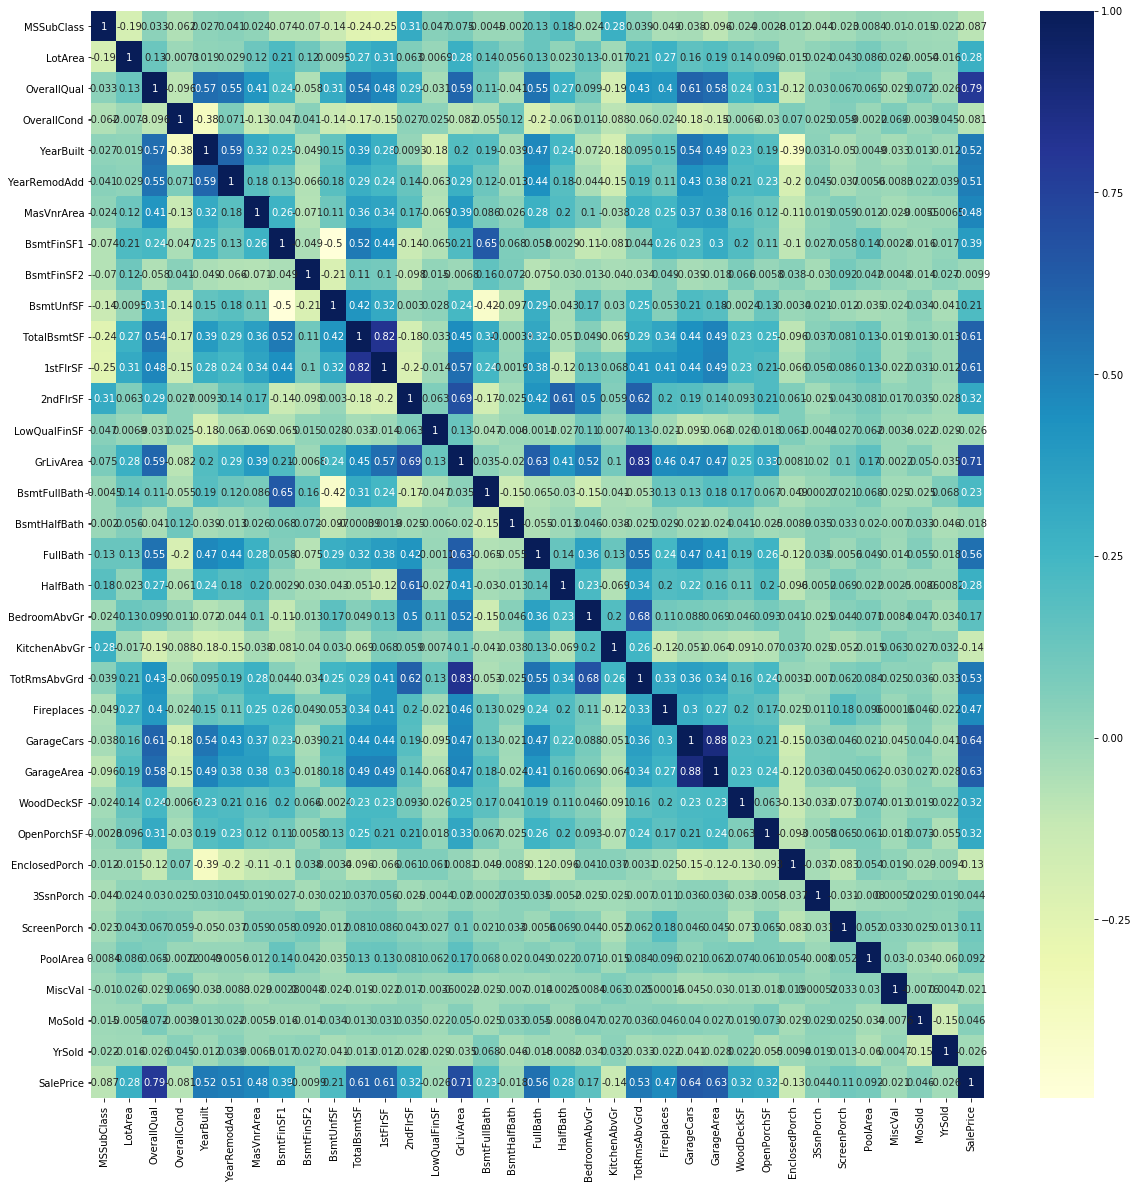

In [35]:
plt.figure(8)
plt.figure(figsize=(20,20))

sns.heatmap(corr, cmap = 'YlGnBu', annot = True)
plt.show()

In [36]:
num_train.drop(columns=['GarageCars', 'TotRmsAbvGrd', 'OverallQual'], axis =1, inplace=True)

C:\Users\arun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
#concat cat_train and num_train to perform PCA
fin_train = pd.concat([num_train,cat_train], axis =1)

In [38]:
fin_train.isnull().sum()

MSSubClass        6
LotArea           6
OverallCond       6
YearBuilt         6
YearRemodAdd      6
MasVnrArea       14
BsmtFinSF1        6
BsmtFinSF2        6
BsmtUnfSF         6
TotalBsmtSF       6
1stFlrSF          6
2ndFlrSF          6
LowQualFinSF      6
GrLivArea         6
BsmtFullBath      6
BsmtHalfBath      6
FullBath          6
HalfBath          6
BedroomAbvGr      6
KitchenAbvGr      6
Fireplaces        6
GarageArea        6
WoodDeckSF        6
OpenPorchSF       6
EnclosedPorch     6
3SsnPorch         6
ScreenPorch       6
PoolArea          6
MiscVal           6
MoSold            6
YrSold            6
SalePrice         6
MSZoning          0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0


In [39]:
fin_train = fin_train[~fin_train['MSSubClass'].isnull()]
fin_train = fin_train[~fin_train['MasVnrArea'].isnull()]

In [40]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [41]:
standard_scaler = StandardScaler()
scale_num = pd.DataFrame(standard_scaler.fit_transform(fin_train), columns = fin_train.columns)

In [42]:
scale_num.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,0.073869,-0.211582,-0.523112,1.053679,0.879321,0.508157,0.581604,-0.288204,-0.945718,-0.456387,...,0.836038,-0.123649,-0.885193,0.262176,0.303866,-0.411026,0.256114,0.289871,0.31182,0.209553
1,-0.873494,-0.085522,2.171970,0.160254,-0.429652,-0.573113,1.179705,-0.288204,-0.642600,0.470152,...,-0.545575,-0.123649,-0.885193,0.262176,0.303866,0.794539,0.256114,0.289871,0.31182,0.209553
2,0.073869,0.095347,-0.523112,0.987500,0.830840,0.320589,0.097845,-0.288204,-0.303289,-0.310332,...,0.836038,-0.123649,-0.885193,0.262176,0.303866,-0.411026,0.256114,0.289871,0.31182,0.209553
3,0.310710,-0.091003,-0.523112,-1.858224,-0.720535,-0.573113,-0.495859,-0.288204,-0.063509,-0.684599,...,-1.927188,-0.123649,0.265876,0.262176,0.303866,-0.411026,0.256114,0.289871,0.31182,-3.419360
4,0.073869,0.425296,-0.523112,0.954410,0.733879,1.357726,0.469460,-0.288204,-0.176612,0.203145,...,0.836038,-0.123649,-0.885193,0.262176,0.303866,-0.411026,0.256114,0.289871,0.31182,0.209553


In [43]:
scale_num.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
count,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,...,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03,1.446000e+03
mean,-7.508977e-17,-6.197018e-17,1.810447e-16,-2.866867e-15,5.158468e-15,-1.153219e-16,-3.232392e-17,1.530971e-16,-6.065534e-18,1.645372e-16,...,1.259174e-16,-7.260789e-16,5.835197e-18,-6.917780e-17,-8.027235e-17,-2.308742e-16,2.710295e-17,-4.044713e-16,-1.382788e-16,6.576114e-17
std,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,...,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00,1.000346e+00
min,-8.734942e-01,-9.953489e-01,-4.116554e+00,-3.281086e+00,-1.690145e+00,-5.731132e-01,-9.708215e-01,-2.882043e-01,-1.285029e+00,-2.409878e+00,...,-1.927188e+00,-3.497176e+00,-8.851935e-01,-3.814235e+00,-4.420767e+00,-2.822158e+00,-5.916238e+00,-3.740455e+00,-4.841230e+00,-3.419360e+00
25%,-8.734942e-01,-3.147600e-01,-5.231118e-01,-5.677214e-01,-8.659768e-01,-5.731132e-01,-9.708215e-01,-2.882043e-01,-7.800211e-01,-5.973076e-01,...,-5.455748e-01,-1.236493e-01,-8.851935e-01,2.621758e-01,3.038665e-01,-4.110262e-01,2.561142e-01,2.898713e-01,3.118201e-01,2.095534e-01
50%,-1.629714e-01,-9.971753e-02,-5.231118e-01,4.444012e-02,4.429963e-01,-5.731132e-01,-1.330397e-01,-2.882043e-01,-2.003642e-01,-1.483013e-01,...,-5.455748e-01,-1.236493e-01,-8.851935e-01,2.621758e-01,3.038665e-01,7.945395e-01,2.561142e-01,2.898713e-01,3.118201e-01,2.095534e-01
75%,3.107104e-01,1.311099e-01,3.752488e-01,9.544100e-01,9.278011e-01,3.426562e-01,5.810539e-01,-2.882043e-01,5.427276e-01,5.494558e-01,...,8.360384e-01,-1.236493e-01,1.416946e+00,2.621758e-01,3.038665e-01,7.945395e-01,2.561142e-01,2.898713e-01,3.118201e-01,2.095534e-01
max,3.152801e+00,2.245681e+01,3.070330e+00,1.285308e+00,1.218684e+00,8.253580e+00,1.143978e+01,8.866078e+00,3.999179e+00,1.153385e+01,...,4.980878e+00,1.337046e+01,1.416946e+00,2.621758e-01,3.038665e-01,7.945395e-01,2.561142e-01,2.898713e-01,3.118201e-01,1.116782e+00


In [44]:
from sklearn.cross_validation import train_test_split
y = scale_num['SalePrice']
X = scale_num.drop(['SalePrice'], axis =1)
print(X.shape)
print(y.shape)

(1446, 58)
(1446,)


C:\Users\arun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(1012, 58)
(434, 58)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr1 = LinearRegression()

lr1.fit(X_train,y_train)

y_pred = lr1.predict(X_test)

print(r2_score(y_pred,y_test))

0.6200971662939518


In [49]:
#performing PCA on the training data
from sklearn.decomposition import PCA
pca =  PCA(svd_solver = 'randomized', random_state = 42)

In [50]:
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [51]:
pca.components_

array([[-2.41161930e-03,  8.72253585e-02, -9.25220330e-02, ...,
         1.29446310e-01, -2.98238581e-02,  7.82664698e-02],
       [ 1.65298161e-02,  1.48541116e-01,  8.27405458e-02, ...,
        -1.07224403e-01,  1.55305626e-03, -7.38652787e-02],
       [-3.48927957e-01,  2.55130162e-01,  1.23038406e-01, ...,
         2.26710725e-02, -2.71058186e-02, -4.48381039e-02],
       ...,
       [ 6.89626142e-01,  1.91588215e-03,  2.50558664e-02, ...,
         6.64474712e-04,  3.73434329e-03, -5.05523975e-03],
       [-5.67877075e-16,  4.18573839e-17,  5.07685413e-17, ...,
        -5.82477063e-17, -1.61930891e-17, -1.38777878e-17],
       [-0.00000000e+00,  2.77555756e-17,  2.10293855e-16, ...,
         1.83880688e-16, -5.55111512e-17, -9.02056208e-17]])

In [52]:
pca.explained_variance_ratio_

array([1.18281416e-01, 5.41168460e-02, 5.28832695e-02, 4.72174633e-02,
       3.76984445e-02, 3.22268539e-02, 2.88493269e-02, 2.68394521e-02,
       2.63163794e-02, 2.59196042e-02, 2.41113660e-02, 2.21110893e-02,
       2.19358937e-02, 2.12199503e-02, 2.02757654e-02, 1.98458947e-02,
       1.93637972e-02, 1.84578503e-02, 1.79655092e-02, 1.77658726e-02,
       1.71554800e-02, 1.66347999e-02, 1.58321196e-02, 1.55737909e-02,
       1.53294428e-02, 1.45307026e-02, 1.40673993e-02, 1.37159866e-02,
       1.34245738e-02, 1.29279628e-02, 1.22453491e-02, 1.21942533e-02,
       1.18690781e-02, 1.12836774e-02, 1.11469246e-02, 1.09851723e-02,
       1.04393990e-02, 1.01279533e-02, 9.71689607e-03, 9.34522649e-03,
       9.17416836e-03, 8.88870854e-03, 8.32210547e-03, 7.68988016e-03,
       7.37656431e-03, 6.99991233e-03, 6.68275952e-03, 5.91649486e-03,
       5.34704894e-03, 5.22174961e-03, 4.39204396e-03, 3.66970878e-03,
       2.63338683e-03, 2.36406794e-03, 1.82148400e-03, 1.55168401e-03,
      

In [53]:
len(pca.explained_variance_ratio_)

58

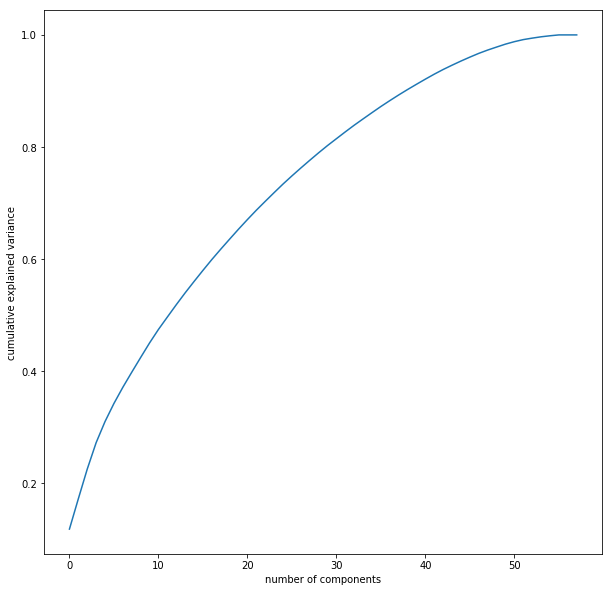

In [54]:
#scree plot
plt.figure(9)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
#finalizing number of compoenents n=44 at 95%
np.cumsum(pca.explained_variance_ratio_)

array([0.11828142, 0.17239826, 0.22528153, 0.27249899, 0.31019744,
       0.34242429, 0.37127362, 0.39811307, 0.42442945, 0.45034906,
       0.47446042, 0.49657151, 0.5185074 , 0.53972736, 0.56000312,
       0.57984902, 0.59921281, 0.61767066, 0.63563617, 0.65340204,
       0.67055752, 0.68719232, 0.70302444, 0.71859823, 0.73392768,
       0.74845838, 0.76252578, 0.77624177, 0.78966634, 0.8025943 ,
       0.81483965, 0.82703391, 0.83890298, 0.85018666, 0.86133359,
       0.87231876, 0.88275816, 0.89288611, 0.90260301, 0.91194823,
       0.9211224 , 0.93001111, 0.93833321, 0.94602309, 0.95339966,
       0.96039957, 0.96708233, 0.97299883, 0.97834587, 0.98356762,
       0.98795967, 0.99162938, 0.99426276, 0.99662683, 0.99844832,
       1.        , 1.        , 1.        ])

In [56]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 44)

df_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
df_train_pca.shape

(1012, 44)

In [57]:
#df_train_pca = pd.DataFrame(df_train_pca, columns)

In [58]:
#creatinng correlation matrix for pca compnents
corrmat = np.corrcoef(df_train_pca.transpose())

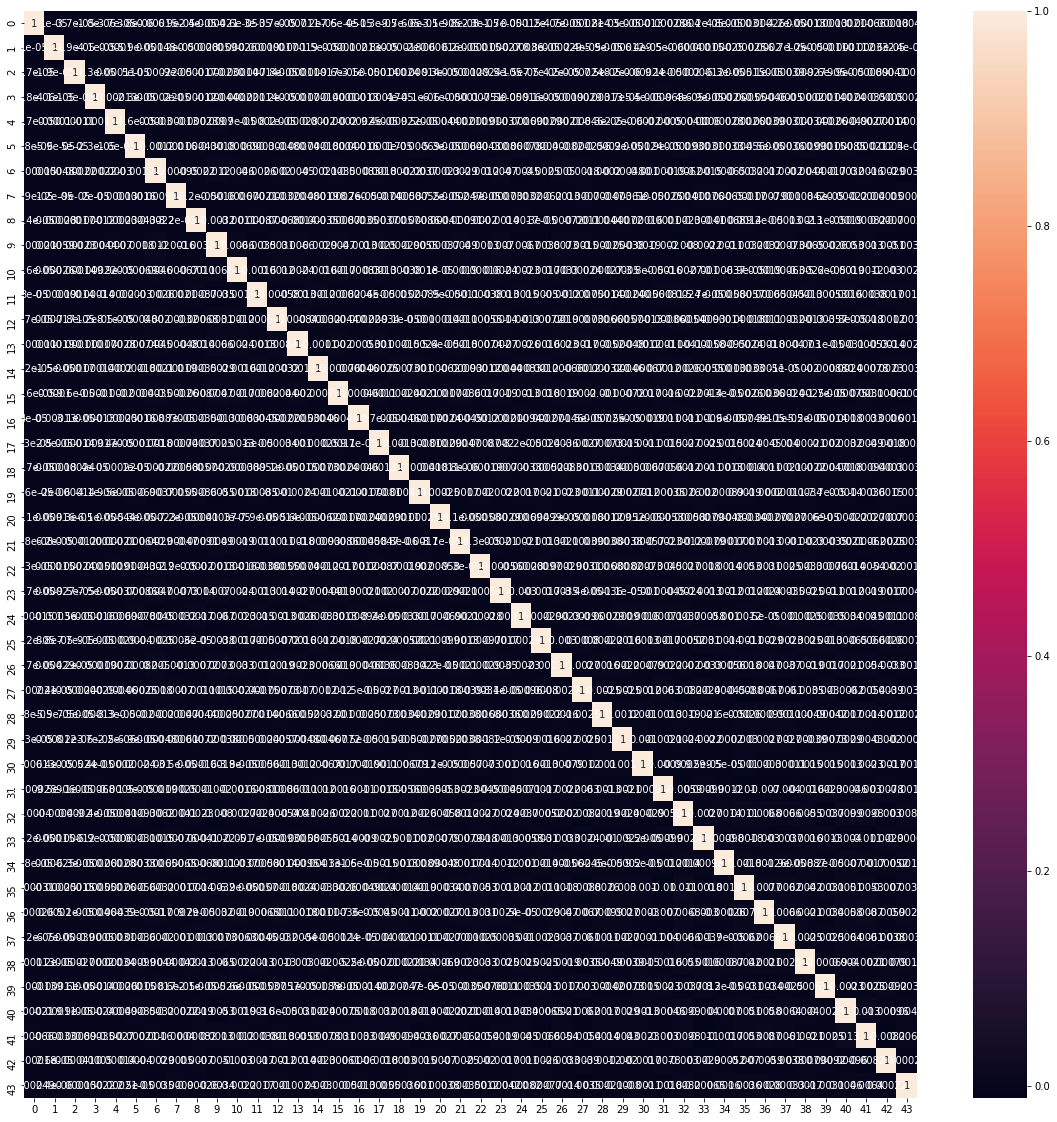

In [59]:
#heat map
plt.figure(10)
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot=True)
plt.show()

In [60]:
#all values are zero

In [61]:
#applying PCA to test data
df_test_pca = pd.DataFrame(pca_final.transform(X_test))
df_test_pca.shape

(434, 44)

In [62]:
#training the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(df_train_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = lr.predict(df_test_pca)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6281565048596605


In [64]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
X_train = df_train_pca

#X_train = sm.add_constant(X_train)
lm = LinearRegression()
rfe = RFE(lm,30)

rfe = rfe.fit(X_train,y_train)

In [65]:
y_pred = rfe.predict(df_test_pca)

print(r2_score(y_test,y_pred))

0.6254872069788358


In [66]:
col_30 = X_train.columns[rfe.support_]

X_train_30 = X_train[col_30]
X_test_30 = df_test_pca[col_30]
lr2 = LinearRegression()

lr2.fit(X_train_30,y_train)

y30_pred=lr2.predict(X_test_30)

print(r2_score(y30_pred,y_test))

0.6318899971120393


In [67]:
X_train = df_train_pca
X_test = df_test_pca
n_features_list = list(range(4, 44))

adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 44):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]
    
    lr_n = LinearRegression()
    lr_n.fit(X_train_rfe_n,y_train)
    
    y_n_pred = lr_n.predict(X_test_rfe_n)
    
    r2.append(r2_score(y_n_pred,y_test))

    

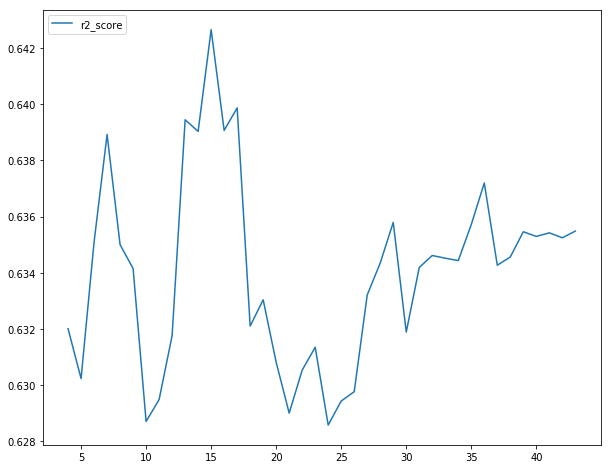

In [68]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
#plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="r2_score")
#plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [69]:
# for 15 Principal components we get a r2 score of 64%

Ridge and Lasso

In [70]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [79]:
X = fin_train.drop(columns =['SalePrice'], axis=1)
#y = train.loc[:,'SalePrice']
y = fin_train['SalePrice']
print(y.shape)


(1446,)


In [80]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size =0.3, random_state = 42)

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 1.0, 10.0, 20,30, 40, 50, 100, 200, 300, 400, 500,800,900, 1000, 2000, 4000, 6000, 8000, 10000 ]}

In [95]:
ridge = Ridge()
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 10.0, 20, 30, 40, 50, 100, 200, 300, 400, 500, 800, 900, 1000, 2000, 4000, 6000, 8000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006205,0.001168,0.001019,0.000633,0.0001,{'alpha': 0.0001},-21015.680450,-22704.513523,-19066.004478,-27934.364976,...,-24177.314451,4205.493640,17,-22034.466994,-21695.731900,-21968.077447,-20108.183354,-17559.661991,-20673.224338,1708.138733
1,0.011200,0.004251,0.001594,0.000795,0.001,{'alpha': 0.001},-21015.637422,-22703.975243,-19065.995638,-27934.337425,...,-24177.192832,4205.538398,16,-22034.446950,-21695.703689,-21968.049768,-20108.156249,-17559.659908,-20673.203313,1708.130517
2,0.005927,0.005817,0.000408,0.000499,0.01,{'alpha': 0.01},-21015.207237,-22698.599291,-19065.907232,-27934.062011,...,-24175.978040,4205.986020,15,-22034.246566,-21695.421771,-21967.773053,-20107.885272,-17559.639078,-20672.993148,1708.048397
3,0.004358,0.005470,0.003524,0.006057,0.05,{'alpha': 0.05},-21013.297543,-22674.855803,-19065.514283,-27932.840183,...,-24170.609373,4207.976155,14,-22033.357110,-21694.173078,-21966.544848,-20106.682606,-17559.546551,-20672.060838,1707.684254
4,0.007412,0.001360,0.001203,0.000747,0.1,{'alpha': 0.1},-21010.915540,-22645.515516,-19065.023020,-27931.317998,...,-24163.967458,4210.465034,13,-22032.247905,-21692.768774,-21965.013345,-20105.183102,-17559.431001,-20670.928825,1707.248558


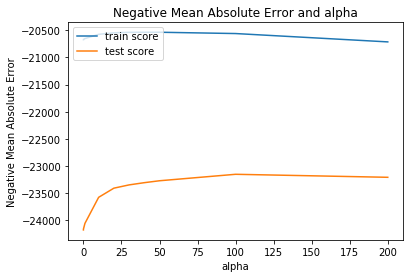

In [97]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [98]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-9.89528025e+01,  4.04169046e-01,  4.95878526e+03,  4.80233511e+02,
        1.27372620e+02,  4.10457512e+01,  5.48933685e+00,  5.07090710e+00,
       -1.31462390e+00,  9.24562010e+00,  2.79710511e+01,  3.02193344e+01,
       -2.44541421e+01,  3.37362433e+01,  5.05201766e+03,  4.94486811e+02,
        3.62224498e+03, -7.78304704e+02, -4.49704548e+03, -5.79752401e+03,
        7.46102630e+03,  3.51797025e+01,  2.89541159e+01, -2.62462380e+01,
        1.35658161e+01,  2.01619572e+01,  5.29553059e+01, -5.48174877e+01,
       -7.18944001e-01, -2.11855303e+02, -1.26274996e+03,  3.82725726e+02,
       -6.22536179e+02,  2.43273554e+03,  5.78895344e+01,  2.87826880e+03,
        5.73868520e+02,  4.77606190e+02, -7.23173610e+03, -1.67561840e+03,
       -6.31491946e+02,  2.68612545e+03,  6.00518305e+03, -8.97618613e+02,
        8.34516470e+02,  4.50063054e+03, -1.23469001e+04,  1.67796972e+03,
        2.61519315e+01, -5.45278460e+02, -1.82691291e+03,  2.32535624e+02,
        4.51629746e+00, -

In [99]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 10.0, 20, 30, 40, 50, 100, 200, 300, 400, 500, 800, 900, 1000, 2000, 4000, 6000, 8000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030715,0.013708,0.003738,0.006024,0.0001,{'alpha': 0.0001},-21015.684844,-22704.572528,-19066.005304,-27934.367661,...,-24177.327609,4205.488739,20,-22034.469097,-21695.734814,-21968.080376,-20108.186200,-17559.662203,-20673.226538,1708.139596
1,0.027711,0.008798,0.000997,0.001261,0.001,{'alpha': 0.001},-21015.681362,-22704.565220,-19066.003899,-27934.364270,...,-24177.324404,4205.489394,19,-22034.467975,-21695.732825,-21968.079049,-20108.184701,-17559.662028,-20673.225316,1708.139141
2,0.018726,0.006224,0.000000,0.000000,0.01,{'alpha': 0.01},-21015.646536,-22704.492139,-19065.989854,-27934.330356,...,-24177.292347,4205.495942,18,-22034.456758,-21695.712934,-21968.065784,-20108.169716,-17559.660272,-20673.213093,1708.134592
3,0.015627,0.009892,0.003128,0.006257,0.05,{'alpha': 0.05},-21015.491752,-22704.167333,-19065.927432,-27934.179628,...,-24177.149875,4205.525045,17,-22034.406904,-21695.624527,-21968.006832,-20108.103116,-17559.652475,-20673.158771,1708.114373
4,0.018760,0.006246,0.000000,0.000000,0.1,{'alpha': 0.1},-21015.298273,-22703.761325,-19065.849404,-27933.991218,...,-24176.971784,4205.561425,16,-22034.344587,-21695.514020,-21967.933143,-20108.019865,-17559.642727,-20673.090868,1708.089100


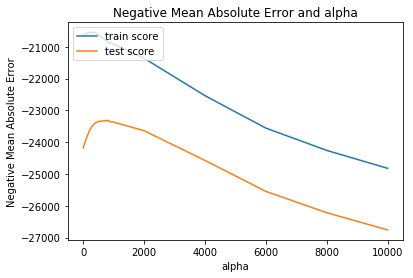

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [102]:
alpha =10000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
lasso.coef_

array([-1.36008004e+02,  4.74820193e-01,  0.00000000e+00,  5.15237631e+02,
        5.60960713e+02,  4.98567244e+01,  1.06593965e+01,  1.71137706e+00,
       -0.00000000e+00,  1.72800436e+01,  5.55719041e+01,  5.46588338e+01,
       -0.00000000e+00,  1.18693999e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.68156684e+01,  3.91188571e+01, -0.00000000e+00,
        2.41287361e+01,  2.48652664e+01,  6.91987152e+01, -4.55624930e+01,
       -7.79470084e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.48172234e+02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -